In [3]:
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import statistics
from mpl_toolkits.mplot3d import Axes3D


## Doctor and Patient classes

In [4]:
class Patient:
    def __init__(self, NO):
        self.priority = 0
        self.NO = NO 
        self.arrival : float
        self.service_time1 = 0.0
        self.service_time2 = 0.0
        self.doctor1 = Doctor('None', 5)
        self.doctor2 = Doctor('None', 5)
        self.end1 = T + 1
        self.end2 = T + 1
        self.wt1 = 0.0
        self.wt2 = 0.0
        self.twt = 0.0

        
    def __eq__(self, other):
        return self.NO == other.NO
    
    def priorityy(self):
        global gen_i
        if lst[gen_i] > 0.85:
            self.priority = 3
        else:
            self.priority = 1
        gen_i += 1
    
class Doctor:
    def __init__(self, number, status = 0):
        self.number = number
        self.status = status #0 means idle and 1 means busy
        self.svr = 0.0
        self.num_visited = 0
    def __eq__(self, other):
        return self.number == other.number



## Random number generator

In [5]:
class CLCG:
    def __init__(self, K):
        self.K = K
        self.A = [0.0 for i in range(K)]
        self.m  = [0.0 for i in range(K)]
        self.length = 0
        self.seed = [1 for i in range(K)]
        self.c = [0.0 for i in range(K)]

    def element_wise_multiply(self, vector1, vector2):
        result = [vector1[i] * vector2[i] for i in range(len(vector1))]
        return result
    
    def element_wise_remainder(self, vector1, vector2):
        result = [vector1[i] % vector2[i] for i in range(len(vector1))]
        return result
    
    def next(self,x = []):
        result = 0
        for i in range(len(x)):
            result += (((-1)**i) * x[i])
        result = result % (self.m[0] - 1)
        if result ==0:
            result = (self.m[0] - 1) / self.m[0]
        else:
            result = result / self.m[0]
        return result

    def maxlength(self):
        P = 1
        for i in range(self.K):
            P = P * (self.m[i] - 1)
        P = P / pow(2, self.K - 1)
        return P
    def generate(self, length):
        X = np.empty([length, self.K])
        X[0] = self.seed
        result = np.empty(length)
        for i in range(1, length):
            
            X[i] = self.element_wise_remainder([x + y for x, y in zip(self.element_wise_multiply(X[i-1], self.A), self.c)], self.m) 

        for i in range(length):
            result[i] = self.next(X[i])
            
        return result
    def d_alpha(self, a, n):
        result = math.sqrt(((-1) / (2 * n)) * math.log(2 * a))
        return result
    
    def KS_test(self, data : np.array, a = 0.05):
        n = len(data)
        sorted_data = np.sort(data)
        ecdf = np.arange(1, n + 1) / n  # Empirical CDF
        cdf = sorted_data  # CDF of the uniform distribution in the interval [0, 1]
        d_stat = np.max(np.abs(ecdf - cdf))
        
        # Calculate critical value
        d_alpha = self.d_alpha(a , n)
        if d_alpha >= d_stat :
            print("KS Test: Fail to reject null hypothesis (data follows uniform distribution)")
            return True
        else:
            print("KS Test: Reject null hypothesis (data does not follow uniform distribution)")
            return False
    

In [6]:
def st(lst, mu, var): # calculates the service time of a customer
    global gen_i
    R = lst[gen_i]
    R2 = lst[gen_i + 1]
    R3 = lst[gen_i + 2]
    Z1 = math.sqrt((-2) * math.log(R)) * math.cos(2 * math.pi * R2)
    X1 = mu + Z1 * (var)
    Z2 = math.sqrt((-2) * math.log(R)) * math.sin(2 * math.pi * R2)
    X2 = mu + Z2 * (var)
    if R3 > 0.5:
        result = X1
    else:
        result = X2
    gen_i += 3
    return abs(result)

def at(Tnow, lst, mu, var): # calculates the arrival time of a customer
    global gen_i
    R = lst[gen_i]
    R2 = lst[gen_i + 1]
    R3 = lst[gen_i + 2]
    Z1 = math.sqrt((-2) * math.log(R)) * math.cos(2 * math.pi * R2)
    X1 = mu + Z1 * (var)
    Z2 = math.sqrt((-2) * math.log(R)) * math.sin(2 * math.pi * R2)
    X2 = mu + Z2 * (var)
    if R3 > 0.5:
        result = X1
    else:
        result = X2
    
    gen_i += 3
    
    return abs(result) + Tnow


In [7]:
ty = CLCG(2)
ty.A = [48271, 40692]
ty.m = [60013, 60017]
ty.seed = [1235, 5879]
maximum_length = ty.maxlength()
lst = ty.generate(100000)

In [8]:
#calculates the minimum value of ith column of my_list list
def min_lst(my_list, i):
    #starting from infinity and iterating over list to find global min
    min_value = float('inf')
    for sublist in my_list:
        
        # Compare the first element of each sublist to find the minimum
        if sublist[i] < min_value:
            min_value = sublist[i]
    return min_value
#calculates the minimum value of ith column of my_list list
def max_lst(my_list, i):
    max_value = float('-inf')
    #starting from -infinity and iterating over list to find global max
    # Iterate over each sublist in my_list
    for sublist in my_list:
        # Compare the first element of each sublist to find the maximum
        if sublist[i] > max_value:
            max_value = sublist[i]
        return max_value

In [9]:
#normalizing profit variable using linear method
def normalize_profit(x_ij, min, max):
    result = (x_ij - min) / (max - min)
    return result

#normalizing cost variable using linear method
def normalize_cost(x_ij, min, max):
    result = (max - x_ij) / (max - min)
    return result

## checking for free doctors

In [10]:
def free_doctor(doctors):
    free_doctors = []
    #finding free servers
    for doctor in doctors:
        if doctor.status == 0:
            free_doctors.append(doctor)
            
    #handling no free server
    if not free_doctors:
        result = False
    #randomly choosing a free server
    else:   

        result = random.choice(free_doctors)
    return result

## arrival

In [11]:
#arrival
def arrival(i,Patients):
    global FEL, Tnow, Doctors, gen_i, twt1, twt2, twt3, Q1,Q2,Q3
    c = Patient(i + 1)
    c.arrival = at(Tnow, lst,20,4)
    if c.arrival < T:
        FEL.append([0, c.arrival, c])
        c.priorityy()
        Patients.append(c)
    
    chosen_doctor = free_doctor(Doctors1)
    if Patients[i].priority ==1:
        
        if not chosen_doctor:
            Q1.append(Patients[i])
            
        else:
            chosen_doctor.status = 1
            Patients[i].service_time1 = st(lst, 15, 10)
            Patients[i].doctor1 = chosen_doctor
            if Tnow > Ti:
                chosen_doctor.num_visited += 1
                chosen_doctor.svr += Patients[i].service_time1
            Patients[i].end1 = Patients[i].service_time1 + Tnow
            
            FEL.append([1, Patients[i].end1, Patients[i]])

            

    elif Patients[i].priority ==3:
        if not chosen_doctor:
            Q3.append(Patients[i])
        else:
            
            chosen_doctor.status = 1
            Patients[i].service_time1 = st(lst, 30, 5)
            Patients[i].doctor1 = chosen_doctor
            if Tnow > Ti:
                chosen_doctor.num_visited += 1
                chosen_doctor.svr += Patients[i].service_time1
            Patients[i].end1 = Patients[i].service_time1 + Tnow
            
            FEL.append([1, Patients[i].end1, Patients[i]])



## Departures

In [12]:
def departure1(patient):
    global twt1, twt2, twt3, FEL, Tnow, Patients, Doctors, gen_i, Q1,Q2,Q3, Ti
    cur_doctor = patient.doctor1
    if not Q3:
        if not Q1:
            cur_doctor.status = 0
        else:
            new_patient = Q1.pop(0)
            new_patient.service_time1 = st(lst, 15, 10)
            new_patient.end1 = new_patient.service_time1 + Tnow
            new_patient.wt1 = new_patient.end1 - new_patient.service_time1 - new_patient.arrival
            new_patient.doctor1 = cur_doctor
            if Tnow > Ti:
                twt1 += new_patient.wt1
                cur_doctor.num_visited += 1
                cur_doctor.svr += new_patient.service_time1
            FEL.append([1, new_patient.end1, new_patient])
    else:
        new_patient = Q3.pop(0)
        new_patient.service_time1 = st(lst, 30, 5)
        new_patient.end1 = new_patient.service_time1 + Tnow
        new_patient.wt1 = new_patient.end1 - new_patient.service_time1 - new_patient.arrival
        new_patient.doctor1 = cur_doctor
        if Tnow > Ti:
            twt3 += new_patient.wt1
            cur_doctor.num_visited += 1
            cur_doctor.svr += new_patient.service_time1
        FEL.append([1, new_patient.end1, new_patient])

    chosen_doctor = free_doctor(Doctors2)

    if not chosen_doctor:
        Q2.append(patient)
    else:
        
        chosen_doctor.status = 1

        if patient.priority == 1:
            #patient.priority = 2
            
            patient.service_time2 = st(lst,10, 7)
            
            patient.end2 = patient.service_time2 + Tnow
            patient.wt2 = patient.end2 - patient.service_time2 - patient.end1
            patient.doctor2 = chosen_doctor
            if Tnow > Ti:
                twt2 += patient.wt2
                chosen_doctor.svr += patient.service_time1
                chosen_doctor.num_visited += 1
            FEL.append([2, patient.end2, patient])

        elif patient.priority == 3:
            #patient.priority = 2
            patient.service_time2 = st(lst,28, 13)
            patient.end2 = patient.service_time2 + Tnow
            patient.wt2 = patient.end2 - patient.service_time2 - patient.end1
            patient.doctor2 = chosen_doctor
            if Tnow > Ti:
                twt2 += patient.wt2
                chosen_doctor.svr += patient.service_time1
                chosen_doctor.num_visited += 1
            FEL.append([2, patient.end2, patient])


In [13]:
def departure2(patient):
    global twt1, twt2, twt3, FEL, Tnow, Patients, Doctors, gen_i, Q1,Q2,Q3
    cur_doctor = patient.doctor2
    if not Q2:
        cur_doctor.status = 0
    else:
        new_patient = Q2.pop(0)
        
        if new_patient.priority == 1:
            #new_patient.priority = 2
            new_patient.service_time2 = st(lst,10, 7)
            new_patient.end2 = new_patient.service_time2 + Tnow
            new_patient.wt2 = new_patient.end2 - new_patient.service_time2 - new_patient.end1
            new_patient.doctor2 = cur_doctor
            if Tnow > Ti:
                twt2 += new_patient.wt2
                cur_doctor.num_visited += 1
                cur_doctor.svr += new_patient.service_time2
            FEL.append([2, new_patient.end2, new_patient])

        elif new_patient.priority == 3:
            #new_patient.priority = 2
            new_patient.service_time2 = st(lst,28, 13)
            new_patient.end2 = new_patient.service_time2 + Tnow
            new_patient.wt2 = new_patient.end2 - new_patient.service_time2 - new_patient.end1
            new_patient.doctor2 = cur_doctor
            if Tnow > Ti:
                twt2 += new_patient.wt2
                cur_doctor.num_visited += 1
                cur_doctor.svr += new_patient.service_time2
            FEL.append([2, new_patient.end2, new_patient])
            


## Initialization

## Simulation Controller

In [14]:
doc1 = 6
doc2 = 6
reps = 10
results =[]
for k in range(1, doc1 + 1):
    for z in range(1, doc2 + 1):
        temp_U = []
        temp_twt = []
        for t in range(reps):
            Doctors1 = [Doctor(i) for i in range(1,k + 1)]
            Doctors2 = [Doctor(i) for i in range(1,z + 1)]
            initialization_patients =[]
            Patients = [0]
            Q1,Q2,Q3 = [] , [], []
            Q1_length, Q2_length, Q3_length = [], [] ,[]
            Tnow_list = []
            twt1, twt2, twt3 = 0.0, 0.0, 0.0
            TWT = 0
            FEL =[]
            T = 32 * 24 * 60
            Ti = 2 * 24 *60
            gen_i = 0
            first_patient = Patient(0)
            first_patient.arrival = 0
            first_patient.priorityy()
            initialization_patients.append(first_patient)
            FEL.append([0, 0, first_patient])

            i = 0 #for initialization(first 2 days)
            j = 0 #for main simulation (30 days)
            while True:
                FEL = sorted(FEL, key=lambda x: x[1])  # Sort based on time
                if FEL:
                    temp = FEL.pop(0)
                    Tnow = temp[1]
                    if Tnow > Ti:
                        Q1_length.append(len(Q1))
                        Q2_length.append(len(Q2))
                        Q3_length.append(len(Q3))
                        Tnow_list.append(Tnow)
                    if T > Tnow:
                        
                        if temp[0] == 0:
                            if Tnow < Ti:
                                arrival(i, initialization_patients)
                                Patients[0] = initialization_patients[-1]
                                i = i + 1
                            else:
                                arrival(j, Patients)
                                j += 1
                        elif temp[0] == 1:
                            #departure    
                            departure1(temp[2])
                        
                        elif temp[0] == 2:
                            departure2(temp[2])
                    else:
                        break
                else:
                    break
            
            sum_utilization1 = 0 #sum of utilization of all batch 1 doctors
            for doc in Doctors1:
                sum_utilization1 += doc.svr
            
            sum_utilization2 = 0 #sum of utilization of all batch 2 doctors
            for doc in Doctors2:
                sum_utilization2 += doc.svr
            Total_time = T + 1 #time last customer leaving counted as Total time 
            for patient in Patients:
                TWT += patient.wt1 + patient.wt2
            Utilization = (sum_utilization1 + sum_utilization2) / Total_time * 100 / (k + z) #finding utilization by averaging all servers utilizations
            temp_U.append(Utilization) #calculating average waiting time and adding to result list
            temp_twt.append(TWT / len(Patients))
        results.append([k, z, statistics.mean(temp_twt), statistics.mean(temp_U)])


## calculations

In [15]:
header1 = ['num of doc1', 'num of doc2', 'twt', 'Utilization']
df1 = pd.DataFrame(results)
df1.columns = header1
df1

,num of doc1,num of doc2,twt,Utilization
0,1,1,2.663027e+01,81.451068
1,1,2,2.009572e+01,55.142807
2,1,3,2.029218e+01,41.189032
3,1,4,2.027290e+01,32.920747
4,1,5,2.027290e+01,27.433956
5,1,6,2.027290e+01,23.514819
6,2,1,8.983941e+00,52.050130
7,2,2,3.528702e-01,40.852894
8,2,3,5.385101e-02,32.731319
9,2,4,3.750465e-02,27.260180


In [16]:
normalized_result = []
ut_min = min_lst(results,3)
ut_max = max_lst(results,3)
wt_min = min_lst(results,2)
wt_max = max_lst(results,2)
#normalizing both criterias using normalize_profit and normalize_cost functions giving them min and max of wanted columns using minn_lst and max_lst
for i in results:
    normalized_result.append([i[0], i[1], normalize_cost(i[2], wt_min, wt_max), normalize_profit(i[3], ut_min, ut_max)])
normalized_result

[[1, 1, 0.0, 1.0],
 [1, 2, 0.24538080646926258, 0.6121482612727072],
 [1, 3, 0.2380034214196533, 0.40643356968052813],
 [1, 4, 0.2387272422702206, 0.28453768252692274],
 [1, 5, 0.2387272422702206, 0.2036482056131946],
 [1, 6, 0.2387272422702206, 0.14587000781767442],
 [2, 1, 0.6626418053986851, 0.5665542080767786],
 [2, 2, 0.9867492857006798, 0.40147802220997203],
 [2, 3, 0.9979778275510034, 0.2817450243404522],
 [2, 4, 0.9985916535695399, 0.2010863021984587],
 [2, 5, 0.9985916535695399, 0.14367409060504366],
 [2, 6, 0.9985916535695399, 0.10061493190998237],
 [3, 1, 0.6738083346558765, 0.3736593197839508],
 [3, 2, 0.9880703280739859, 0.2805621948063596],
 [3, 3, 0.9994028891055257, 0.20103386721479044],
 [3, 4, 1.0, 0.14342798496817621],
 [3, 5, 1.0, 0.10039958947772337],
 [3, 6, 1.0, 0.0669330596518156],
 [4, 1, 0.6738083346558765, 0.2587676200360713],
 [4, 2, 0.9880703280739859, 0.20033529917939188],
 [4, 3, 0.9994028891055257, 0.14362914633332782],
 [4, 4, 1.0, 0.10039958947772326],

## Plotting

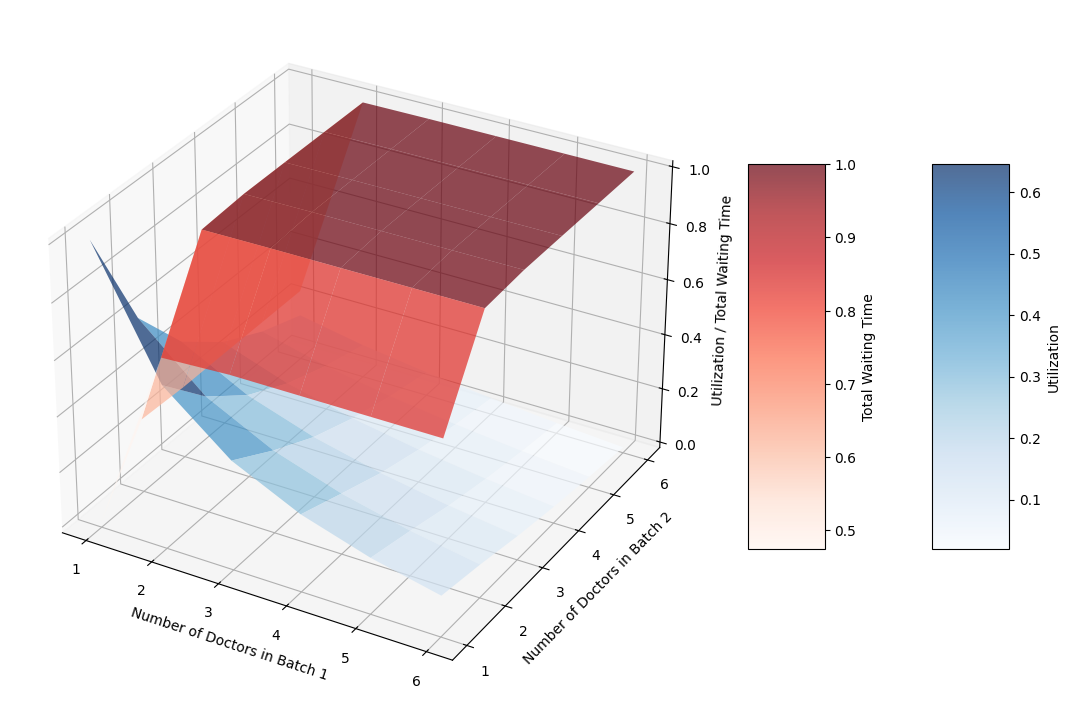

In [17]:
# Extract unique batch sizes
num_doctors_batch1 = sorted(set(row[0] for row in normalized_result))
num_doctors_batch2 = sorted(set(row[1] for row in normalized_result))

# Create meshgrid
X, Y = np.meshgrid(num_doctors_batch1, num_doctors_batch2)

# Initialize arrays for Z values
Z_utilization = np.zeros_like(X, dtype=float)
Z_waiting_time = np.zeros_like(X, dtype=float)

# Fill Z arrays with the data
for row in normalized_result:
    batch1, batch2, waiting_time, utilization = row
    idx1 = num_doctors_batch1.index(batch1)
    idx2 = num_doctors_batch2.index(batch2)
    Z_utilization[idx2, idx1] = utilization
    Z_waiting_time[idx2, idx1] = waiting_time

# Create the figure and 3D axes
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

# Plot utilization
surf1 = ax.plot_surface(X, Y, Z_utilization, cmap='Blues', alpha=0.7)

# Plot total waiting time
surf2 = ax.plot_surface(X, Y, Z_waiting_time, cmap='Reds', alpha=0.7)

# Customize the plot
ax.set_xlabel('Number of Doctors in Batch 1')
ax.set_ylabel('Number of Doctors in Batch 2')
ax.set_zlabel('Utilization / Total Waiting Time')

# Add color bars to show the scale of each plot
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5, label='Utilization')
fig.colorbar(surf2, ax=ax, shrink=0.5, aspect=5, label='Total Waiting Time')

plt.show()


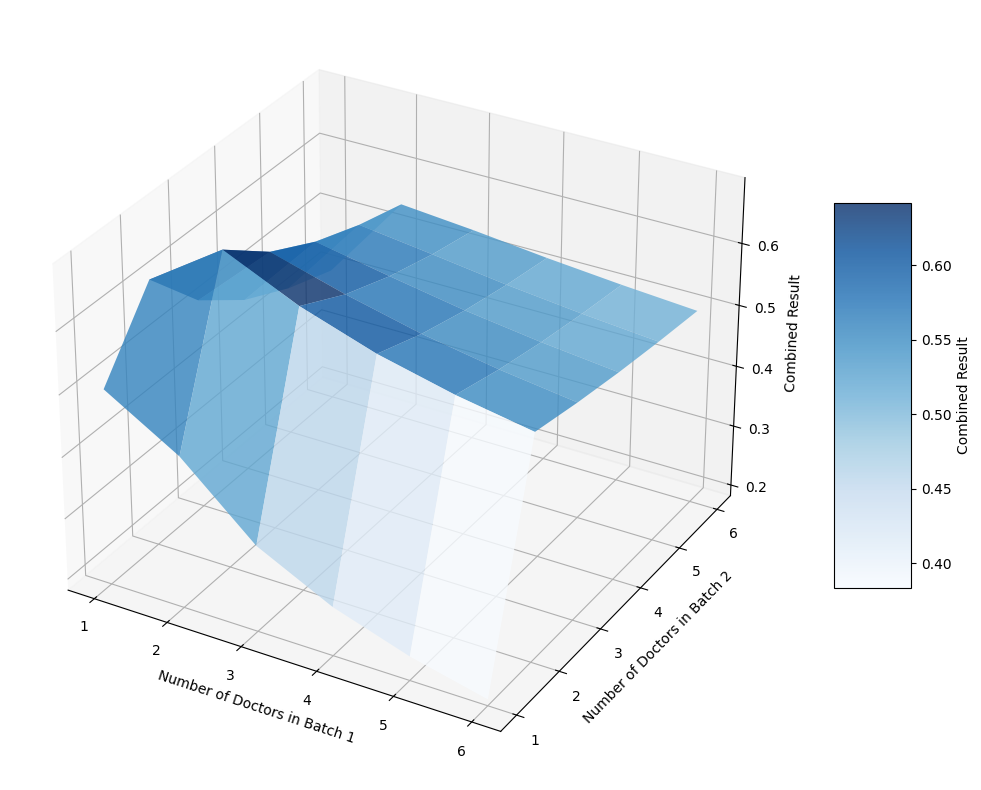

In [45]:
# Normalize the data (if not already normalized)
data = np.array(normalized_result)
num_doctors_batch1 = data[:, 0]
num_doctors_batch2 = data[:, 1]
total_waiting_time = data[:, 2]
utilization = data[:, 3]

# Assuming total_waiting_time and utilization are already normalized
# If not, normalize them
# total_waiting_time = (total_waiting_time - np.min(total_waiting_time)) / (np.max(total_waiting_time) - np.min(total_waiting_time))
# utilization = (utilization - np.min(utilization)) / (np.max(utilization) - np.min(utilization))

# Combine utilization and total waiting time using a weighted mean
alpha = 0.5  # Set alpha value (can be adjusted as needed)
combined_result = alpha * utilization + (1 - alpha) * total_waiting_time

# Create a meshgrid for the doctors batches
unique_batch1 = np.unique(num_doctors_batch1)
unique_batch2 = np.unique(num_doctors_batch2)
X, Y = np.meshgrid(unique_batch1, unique_batch2)

# Reshape the data to fit the grid
Z_combined = combined_result.reshape(len(unique_batch1), len(unique_batch2))

# Create the figure and 3D axes with a larger size
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the combined result
surf = ax.plot_surface(X, Y, Z_combined, cmap='Blues', alpha=0.8)

# Customize the plot
ax.set_xlabel('Number of Doctors in Batch 1')
ax.set_ylabel('Number of Doctors in Batch 2')
ax.set_zlabel('Combined Result')

# Add a color bar to show the scale of the combined result
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Combined Result')

plt.show()

In [44]:
combined_array = np.column_stack((num_doctors_batch1, num_doctors_batch2, combined_result))
max_utility = np.max(combined_array[:,2])
max_utility
max_index = np.argmax(combined_array[:, 2])
max_row = combined_array[max_index, :]
max_row

array([2.        , 2.        , 0.86969503])